___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Fraud Detection Project***". This is the last project of the Capstone Series.

One of the challenges in this project is the absence of domain knowledge. So without knowing what the column names are, you will only be interested in their values. The other one is the class frequencies of the target variable are quite imbalanced.

You will implement ***Logistic Regression, Random Forest, Neural Network*** algorithms and ***SMOTE*** technique. Also visualize performances of the models using ***Seaborn, Matplotlib*** and ***Yellowbrick*** in a variety of ways.

At the end of the project, you will have the opportunity to deploy your model by ***Flask API***.

Before diving into the project, please take a look at the Determines and Tasks.

- ***NOTE:*** *This tutorial assumes that you already know the basics of coding in Python and are familiar with model deployement (flask api) as well as the theory behind Logistic Regression, Random Forest, Neural Network.*



---
---


# #Determines
The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where it has **492 frauds** out of **284,807** transactions. The dataset is **highly unbalanced**, the positive class (frauds) account for 0.172% of all transactions.

**Feature Information:**

**Time**: This feature is contains the seconds elapsed between each transaction and the first transaction in the dataset. 

**Amount**:  This feature is the transaction Amount, can be used for example-dependant cost-senstive learning. 

**Class**: This feature is the target variable and it takes value 1 in case of fraud and 0 otherwise.

---

The aim of this project is to predict whether a credit card transaction is fraudulent. Of course, this is not easy to do.
First of all, you need to analyze and recognize your data well in order to draw your roadmap and choose the correct arguments you will use. Accordingly, you can examine the frequency distributions of variables. You can observe variable correlations and want to explore multicollinearity. You can show the distribution of the target variable's classes over other variables. 
Also, it is useful to take missing values and outliers.

After these procedures, you can move on to the model building stage by doing the basic data pre-processing you are familiar with. 

Start with Logistic Regression and evaluate model performance. You will apply the SMOTE technique used to increase the sample for unbalanced data. Next, rebuild your Logistic Regression model with SMOTE applied data to observe its effect.

Then, you will use three different algorithms in the model building phase. You have applied Logistic Regression and Random Forest in your previous projects. However, the Deep Learning Neural Network algorithm will appear for the first time.

In the final step, you will deploy your model using ***Flask API***. 

**Optional**: You can Dockerize your project and deploy on cloud.

---
---


# #Tasks

#### 1. Exploratory Data Analysis & Data Cleaning

- Import Modules, Load Data & Data Review
- Exploratory Data Analysis
- Data Cleaning



    
#### 2. Data Preprocessing

- Scaling
- Train - Test Split


#### 3. Model Building

- Logistic Regression without SMOTE
- Apply SMOTE
- Logistic Regression with SMOTE
- Random Forest Classifier with SMOTE
- Neural Network

#### 4. Model Deployement

- Save and Export the Model as .pkl
- Save and Export Variables as .pkl 




---
---


## 1. Exploratory Data Analysis & Data Cleaning

### Import Modules, Load Data & Data Review

In [1]:
#from google.colab import drive     

In [ ]:
#drive.mount('/content/drive')      #-----> for colab

In [10]:
conda install scikit-learn-intelex

Note: you may need to restart the kernel to use updated packages.
Solving environment: ...working... done

# All requested packages already installed.




In [11]:
from sklearnex import patch_sklearn
patch_sklearn()

Intel(R) Extension for Scikit-learn* enabled (https://github.com/intel/scikit-learn-intelex)


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

import plotly.express as px
import matplotlib.gridspec as gridspec

plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings('ignore')
# pd.set_option('display.max_rows', 500)
pd.set_option('display.float_format', lambda x: '%.2f' % x)
sns.set_style("whitegrid")

In [13]:
df = pd.read_csv('creditcard.csv')   

### Exploratory Data Analysis

2013 Eylul ayinda Avrupa' da gerceklesen 2 gunluk satin alma islemlerinden olusan bir data setimiz var. Gizlilik nedeniyle gercek veri olarak sadece Time ve Amount ve islemin dolandiricilik islemi olup olmadigi bilgisi paylasilmis. Geriye kalan sutunlar ise PCA yontemi ile elde edilen componentleri temsil ediyor :

In [14]:
df.head(5)

Time    V1    V2   V3    V4    V5    V6    V7    V8    V9  ...   V21   V22  \
0  0.00 -1.36 -0.07 2.54  1.38 -0.34  0.46  0.24  0.10  0.36  ... -0.02  0.28   
1  0.00  1.19  0.27 0.17  0.45  0.06 -0.08 -0.08  0.09 -0.26  ... -0.23 -0.64   
2  1.00 -1.36 -1.34 1.77  0.38 -0.50  1.80  0.79  0.25 -1.51  ...  0.25  0.77   
3  1.00 -0.97 -0.19 1.79 -0.86 -0.01  1.25  0.24  0.38 -1.39  ... -0.11  0.01   
4  2.00 -1.16  0.88 1.55  0.40 -0.41  0.10  0.59 -0.27  0.82  ... -0.01  0.80   

    V23   V24   V25   V26   V27   V28  Amount  Class  
0 -0.11  0.07  0.13 -0.19  0.13 -0.02  149.62      0  
1  0.10 -0.34  0.17  0.13 -0.01  0.01    2.69      0  
2  0.91 -0.69 -0.33 -0.14 -0.06 -0.06  378.66      0  
3 -0.19 -1.18  0.65 -0.22  0.06  0.06  123.50      0  
4 -0.14  0.14 -0.21  0.50  0.22  0.22   69.99      0  

[5 rows x 31 columns]

In [15]:
df.tail(5)

Time     V1    V2    V3    V4    V5    V6    V7    V8   V9  ...  \
284802 172786.00 -11.88 10.07 -9.83 -2.07 -5.36 -2.61 -4.92  7.31 1.91  ...   
284803 172787.00  -0.73 -0.06  2.04 -0.74  0.87  1.06  0.02  0.29 0.58  ...   
284804 172788.00   1.92 -0.30 -3.25 -0.56  2.63  3.03 -0.30  0.71 0.43  ...   
284805 172788.00  -0.24  0.53  0.70  0.69 -0.38  0.62 -0.69  0.68 0.39  ...   
284806 172792.00  -0.53 -0.19  0.70 -0.51 -0.01 -0.65  1.58 -0.41 0.49  ...   

        V21  V22   V23   V24   V25   V26   V27   V28  Amount  Class  
284802 0.21 0.11  1.01 -0.51  1.44  0.25  0.94  0.82    0.77      0  
284803 0.21 0.92  0.01 -1.02 -0.61 -0.40  0.07 -0.05   24.79      0  
284804 0.23 0.58 -0.04  0.64  0.27 -0.09  0.00 -0.03   67.88      0  
284805 0.27 0.80 -0.16  0.12 -0.57  0.55  0.11  0.10   10.00      0  
284806 0.26 0.64  0.38  0.01 -0.47 -0.82 -0.00  0.01  217.00      0  

[5 rows x 31 columns]

In [13]:
#conda install -c conda-forge pandas-profiling=2.6.0

In [14]:
#pip install -U pandas-profiling

In [16]:
import pandas_profiling
df.profile_report()

In [17]:
df.shape

(284807, 31)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [16]:
df.describe().T.style.background_gradient(cmap='Spectral_r')

Ilk fraud islemi 6. dakikada, son fraud islemi ise yaklasik 47. saatte gerceklesmis :

In [17]:
df[df.Class == 1].describe().T.style.background_gradient(cmap='Spectral_r')

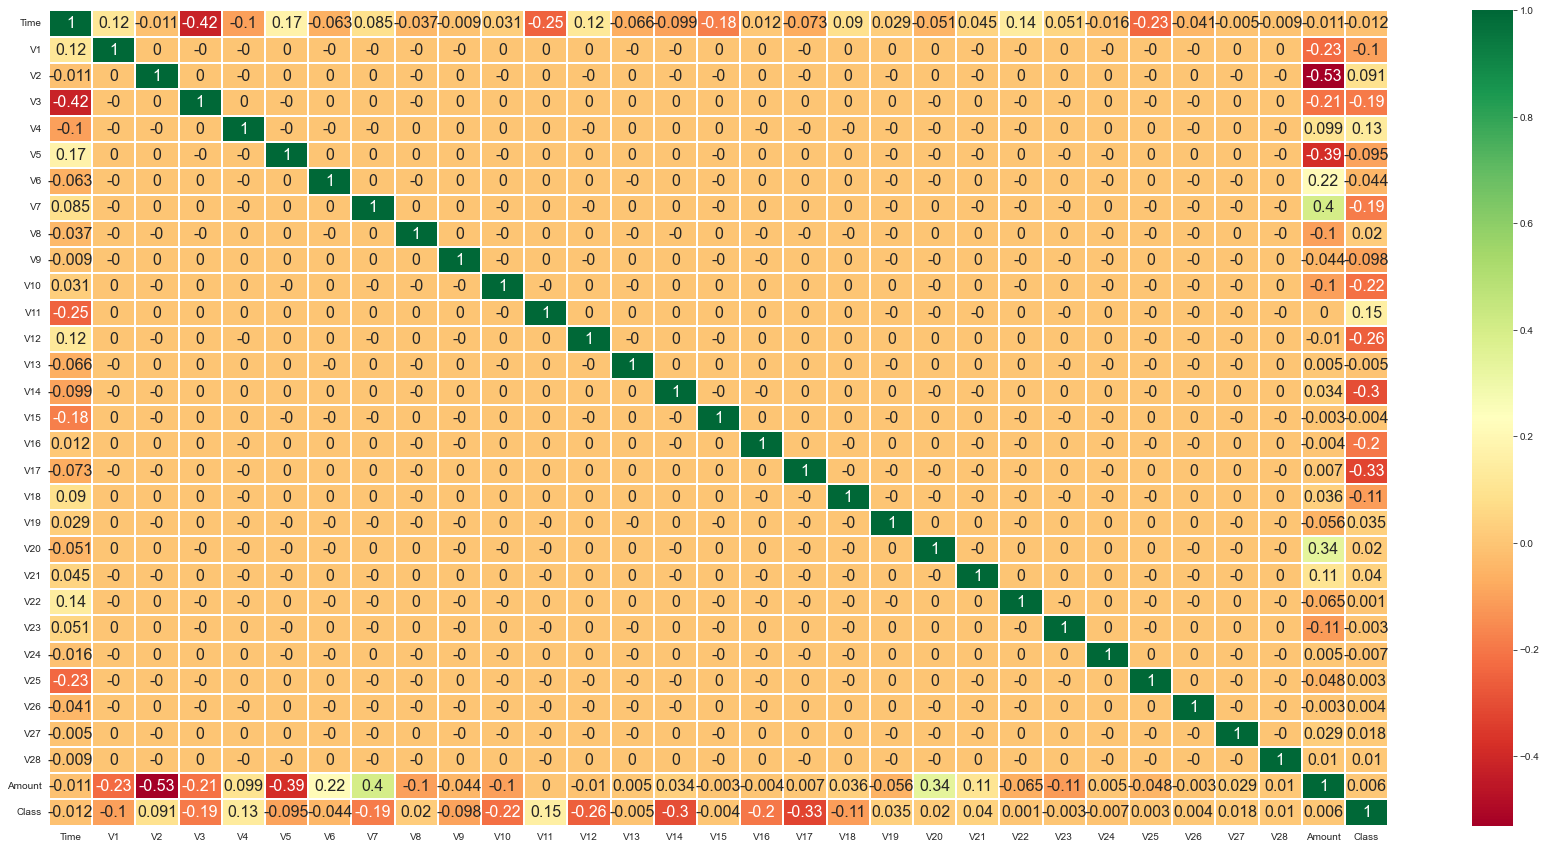

In [18]:
plt.figure(figsize = (30, 15))
sns.heatmap(round(df.corr(), 3), annot = True, cmap = 'RdYlGn', linewidth = 0.2, annot_kws = {'size' : 16});

Class ile corr iliskileri yuksek olan feature' lar ile de model kurduk fakat azinlikta olan 1 class' inin corr iliskisine bakarak model kurmak daha saglikli olacagi icin feature selection islemini asagida shap yontemi ile yapmayi tercih ettik.

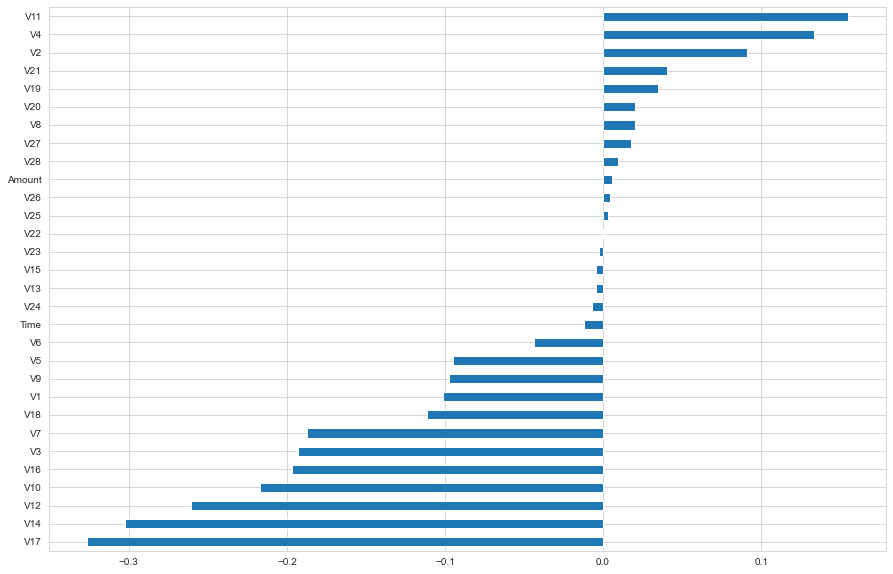

In [19]:
plt.figure(figsize=(15,10))
df.corr()["Class"].drop("Class").sort_values().plot.barh();

Fraud islemleri 48 saat icine rastgele dagilim gostermis :

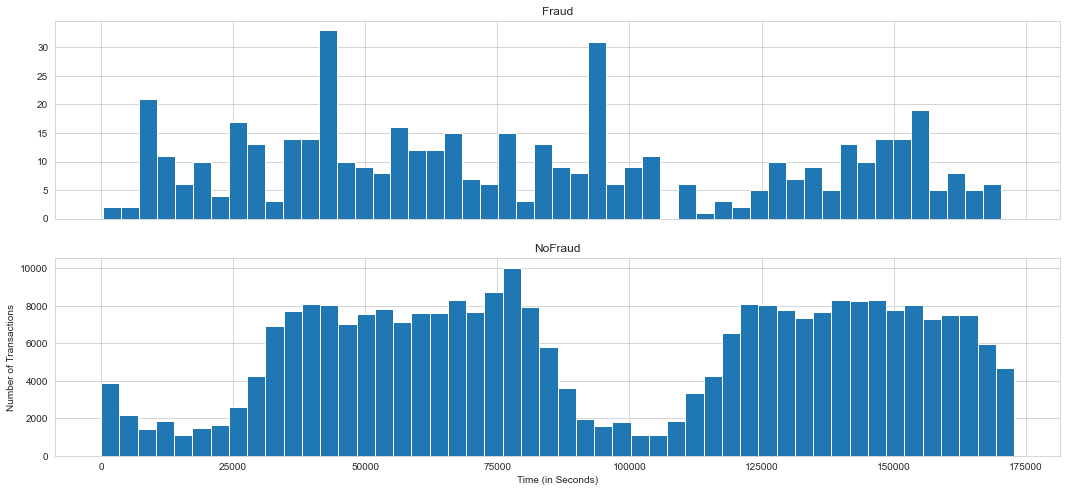

In [20]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(18,8))

bins = 50

ax1.hist(df.Time[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Time[df.Class == 0], bins = bins)
ax2.set_title('NoFraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Number of Transactions')
plt.show()

Time ile Fraud olma durumunun bir baska gosterimi :

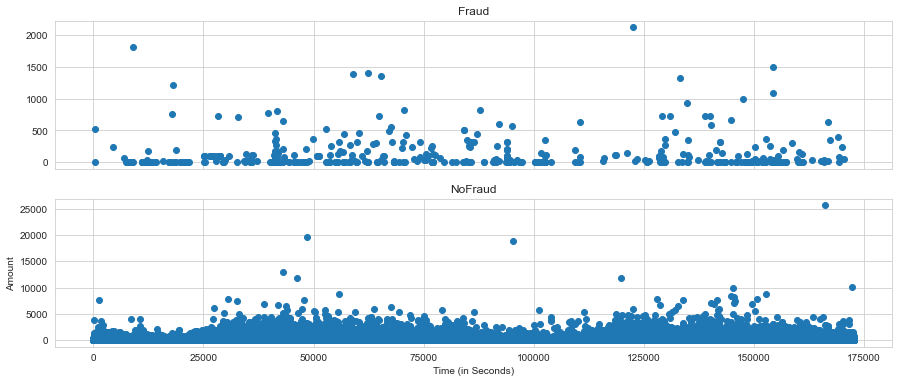

In [21]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,6))

ax1.scatter(df.Time[df.Class == 1], df.Amount[df.Class == 1])
ax1.set_title('Fraud')

ax2.scatter(df.Time[df.Class == 0], df.Amount[df.Class == 0])
ax2.set_title('NoFraud')

plt.xlabel('Time (in Seconds)')
plt.ylabel('Amount')
plt.show()

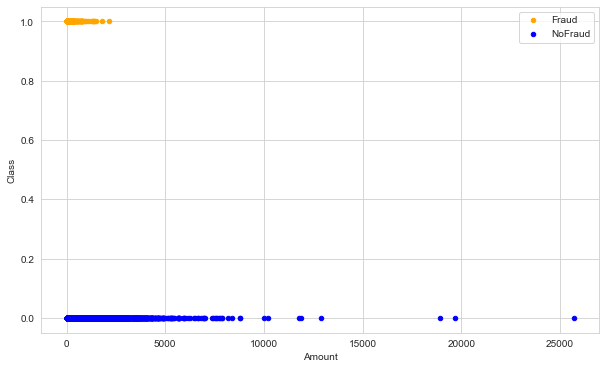

In [22]:
ax = df.loc[df['Class'] == 1].plot.scatter(x='Amount', y='Class', color='Orange', label='Fraud')
df.loc[df['Class'] == 0].plot.scatter(x='Amount', y='Class', color='Blue', label='NoFraud', ax=ax)
plt.show()

Ustteki ve alttaki gosterim, yapilan islemlerin fiyatini temsil ediyor. Fraud islemlerinde en fazla yapilan harcama 2500 euro civarlarinda iken Fraud olmayan islemler 25000 euro' ya kadar cikmis.

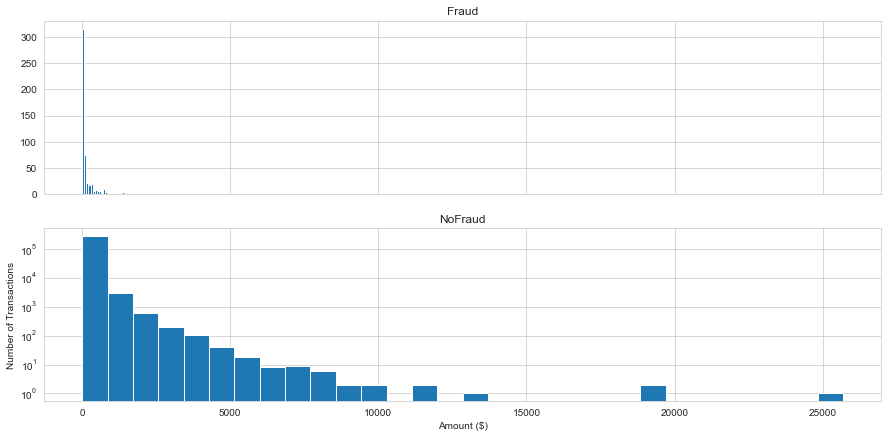

In [23]:
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True, figsize=(15,7))

bins = 30

ax1.hist(df.Amount[df.Class == 1], bins = bins)
ax1.set_title('Fraud')

ax2.hist(df.Amount[df.Class == 0], bins = bins)
ax2.set_title('NoFraud')

plt.xlabel('Amount ($)')
plt.ylabel('Number of Transactions')
plt.yscale('log')
plt.show()

1 ve 0 class' larinin PCA yontemi ile olusturulan componentlerin icindeki dagilimlarini gormek icin asagidaki grafikleri cizdirdik. 9, 10, 11, 12, 14, 16 ve ozellikle de 17. ve 18. componentler icinde class' larin birbirinden daha iyi ayristigini soyleyebiliriz :

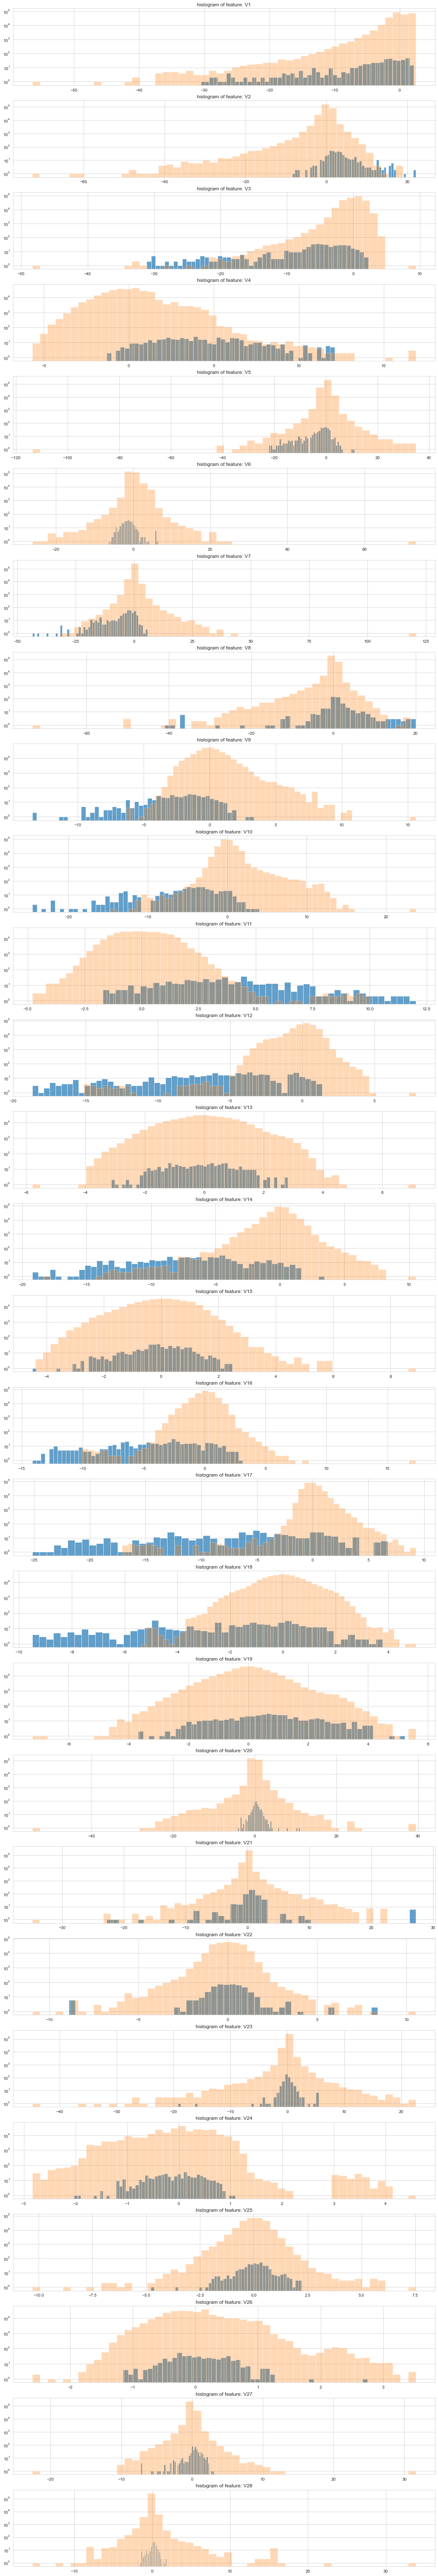

In [24]:
plt.figure(figsize=(18,28*4))
gs = gridspec.GridSpec(28, 1)
for i, cn in enumerate(df.drop(['Time', 'Class', 'Amount'], axis=1)):
    ax = plt.subplot(gs[i])
    plt.hist(df[cn][df.Class == 1], bins=50, alpha = 0.7)
    plt.hist(df[cn][df.Class == 0], bins=50, alpha = 0.3)
    plt.yscale('log')
    ax.set_xlabel('')
    ax.set_title('histogram of feature: ' + str(cn))
plt.show()

In [25]:
df.duplicated().sum()

1081

In [26]:
# df.drop_duplicates(inplace=True)

In [27]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

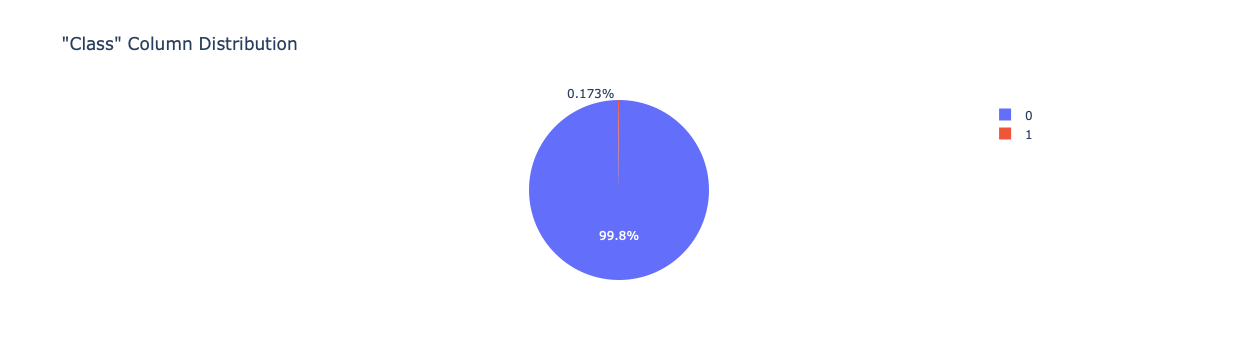

In [28]:
fig = px.pie(df, values = df['Class'].value_counts(), 
             names = (df['Class'].value_counts()).index, 
             title = '"Class" Column Distribution')
fig.show()

### Data Cleaning
Check Missing Values and Outliers

In [ ]:
df.isnull().sum().sum()

0

Feature' lar icinde az da olsa outlier verilere rastlandi. Fakat feature' larimiz PCA yontemi ile elde edilen componentler oldugu icin outlier verilerin ne olduklari hakkinda bilgi sahibi degiliz. 1 class' ina ait verimiz az oldugu icin de veri kaybetmemek adina outlier verileri silmeden devam etme karari aldik :

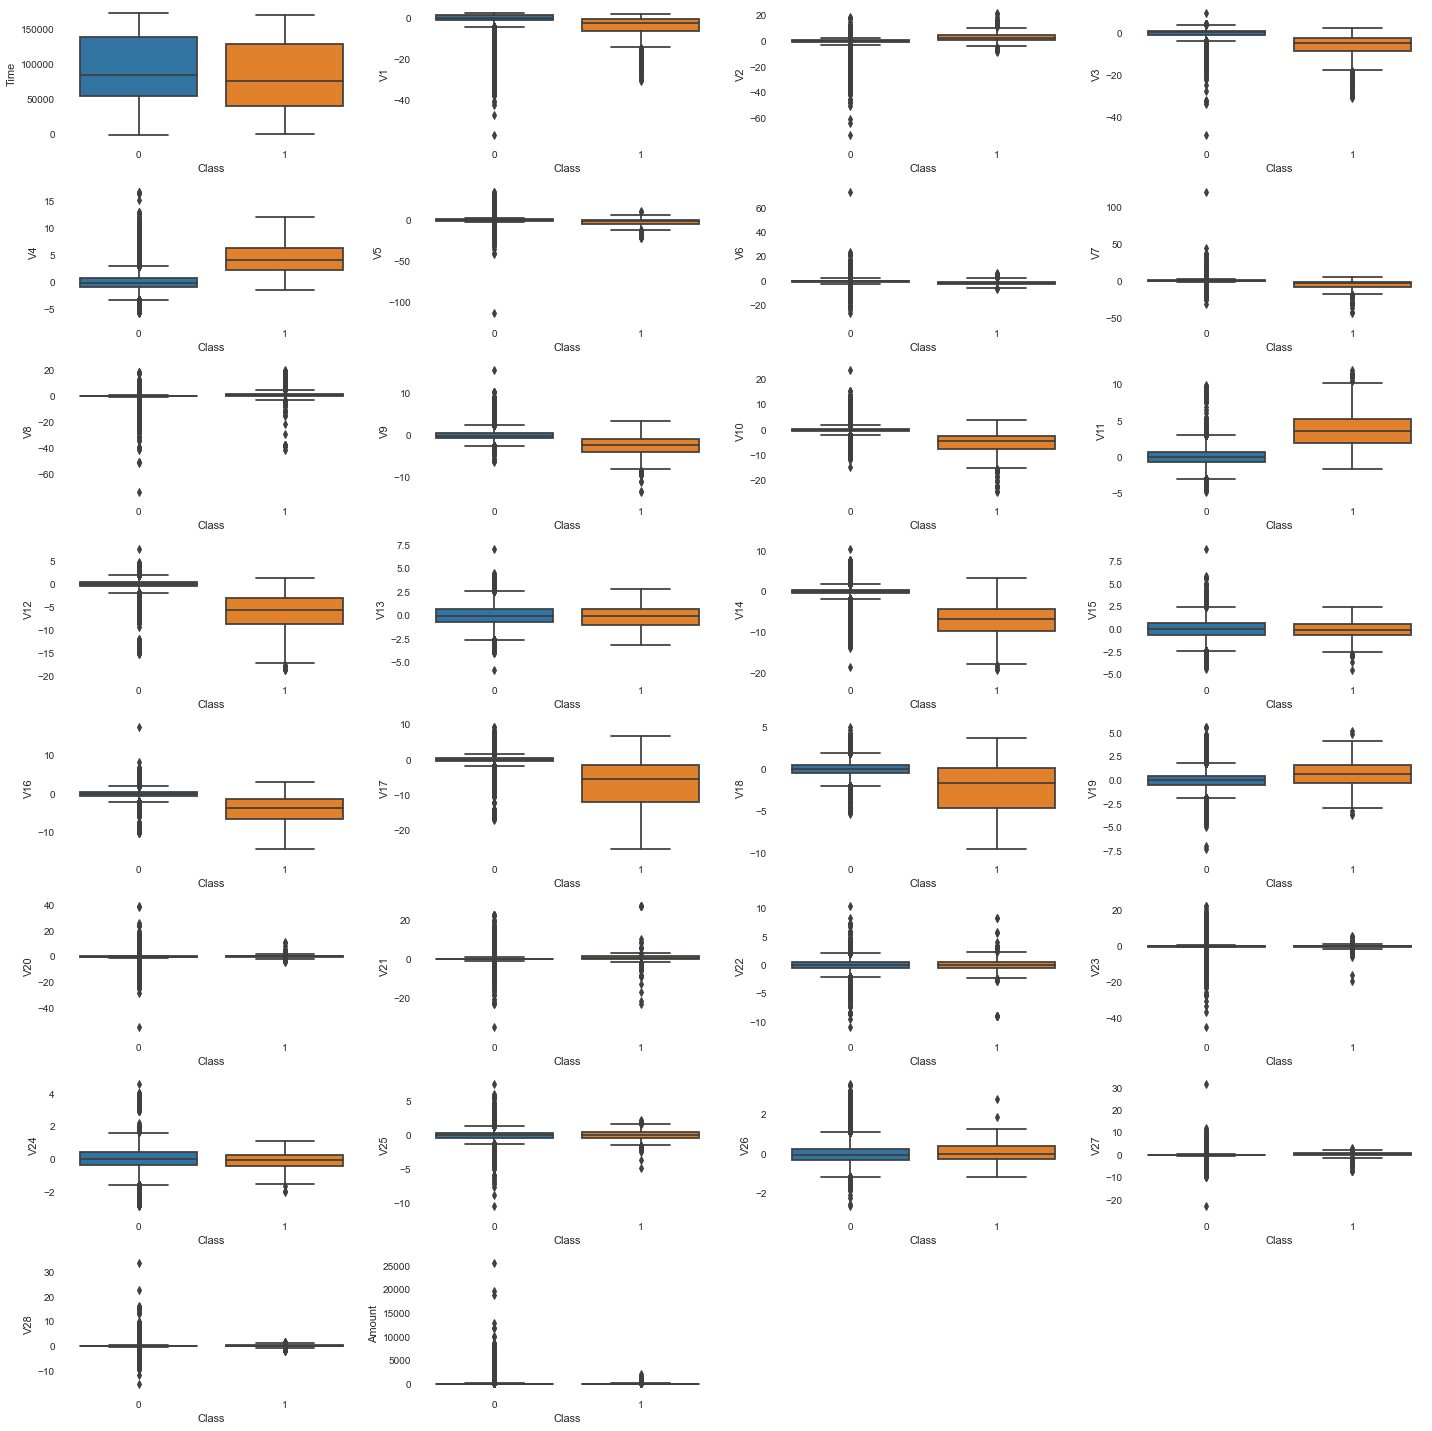

In [ ]:
index = 0
plt.figure(figsize=(20,20))
for feature in df.columns :
    if feature != 'Class' :
        index += 1
        plt.subplot(8,4,index)
        sns.boxplot(x = 'Class', y = feature, data = df)
plt.tight_layout()
plt.show();

---
---


## 2. Data Preprocessing

#### Train - Test Split

As in this case, for extremely imbalanced datasets you may want to make sure that classes are balanced across train and test data.

In [29]:
X = df.drop(['Class', 'Time'], axis = 1)
y = df.Class

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, stratify=y, random_state=42)

#### Scaling

In [32]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression

In [33]:
operations = [("scaler", StandardScaler()), ('log', LogisticRegression())]

---
---


## 3. Model Building
It was previously stated that you need to make class prediction with three different algorithms. As in this case, different approaches are required to obtain better performance on unbalanced data.

This dataset is severely **unbalanced** (most of the transactions are non-fraud). So the algorithms are much more likely to classify new observations to the majority class and high accuracy won't tell us anything. To address the problem of imbalanced dataset we can use undersampling and oversampling data approach techniques. Oversampling increases the number of minority class members in the training set. The advantage of oversampling is that no information from the original training set is lost unlike in undersampling, as all observations from the minority and majority classes are kept. On the other hand, it is prone to overfitting. 

There is a type of oversampling called **[SMOTE](https://www.geeksforgeeks.org/ml-handling-imbalanced-data-with-smote-and-near-miss-algorithm-in-python/)** (Synthetic Minority Oversampling Technique), which we are going to use to make our dataset balanced. It creates synthetic points from the minority class.

- It is important that you can evaluate the effectiveness of SMOTE. For this reason, implement the Logistic Regression algorithm in two different ways, with SMOTE applied and without.

***Note***: 

- *Do not forget to import the necessary libraries and modules before starting the model building!*

- *If you are going to use the cross validation method to be more sure of the performance of your model for unbalanced data, you should make sure that the class distributions in the iterations are equal. For this case, you should use **[StratifiedKFold](https://www.analyseup.com/python-machine-learning/stratified-kfold.html)** instead of regular cross validation method.*

### Logistic Regression without SMOTE

- The steps you are going to cover for this algorithm are as follows: 

   i. Import Libraries
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Import Libraries***

In [34]:
from sklearn.linear_model import LogisticRegression

***ii. Model Training***

In [35]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [36]:
from sklearn.metrics import confusion_matrix, classification_report, precision_score, recall_score, accuracy_score, f1_score

In [37]:
pipe_model = Pipeline(steps=operations)

In [38]:
pipe_model.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('log', LogisticRegression())])

In [39]:
eval_metric(pipe_model, X_train, y_train, X_test, y_test)

Test_Set
[[28426     6]
 [   15    34]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.85      0.69      0.76        49

    accuracy                           1.00     28481
   macro avg       0.92      0.85      0.88     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255846     37]
 [   163    280]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.88      0.63      0.74       443

    accuracy                           1.00    256326
   macro avg       0.94      0.82      0.87    256326
weighted avg       1.00      1.00      1.00    256326



#### Cross Validate

In [40]:
from sklearn.model_selection import cross_validate

In [41]:
operations = [('scaler',StandardScaler()),('log',LogisticRegression())]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.88
test_recall      0.63
test_f1          0.73
test_accuracy    1.00
dtype: float64

In [42]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve

In [43]:
y_pred = pipe_model.predict(X_test)
log_f1 = f1_score(y_test, y_pred)
log_recall = recall_score(y_test, y_pred)
log_auc = roc_auc_score(y_test, y_pred)

***with class_weight***

In [44]:
class_weights = {0:1, 1:15}

In [45]:
operations = [("scaler", StandardScaler()), ('log', LogisticRegression(class_weight=class_weights))]

In [46]:
pipe_model_weight = Pipeline(steps=operations)

In [47]:
pipe_model_weight.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log', LogisticRegression(class_weight={0: 1, 1: 15}))])

class_weight isleminden sonra presicion skorlari duserken recall skorlarimiz yukseldi :

In [48]:
eval_metric(pipe_model_weight, X_train, y_train, X_test, y_test)

Test_Set
[[28405    27]
 [    8    41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.60      0.84      0.70        49

    accuracy                           1.00     28481
   macro avg       0.80      0.92      0.85     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255736    147]
 [    76    367]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.71      0.83      0.77       443

    accuracy                           1.00    256326
   macro avg       0.86      0.91      0.88    256326
weighted avg       1.00      1.00      1.00    256326



Cross Validate sonucu elde ettigimiz precision skorlari tek seferlik skorlardan biraz dusuk cikti :

In [57]:
operations = [('scaler',StandardScaler()),('log',LogisticRegression(class_weight=class_weights))]
model = Pipeline(operations)

scores = cross_validate(model, X_train, y_train, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.70
test_recall      0.82
test_f1          0.76
test_accuracy    1.00
dtype: float64

***iii. Prediction and Model Evaluating***

In [49]:
y_pred = pipe_model_weight.predict(X_test)

In [50]:
y_pred_proba = pipe_model_weight.predict_proba(X_test)

In [51]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.sample(10)

0     1     2     3     4     5     6      7     8     9  ...  \
86102  -4.49  3.83  0.38 -0.79 -0.65  1.95 -4.38 -13.00 -0.66 -0.80  ...   
278098 -0.39 -0.02 -0.10  0.27  0.98 -0.16  0.91  -0.14 -2.22  0.71  ...   
185470 -4.54 -3.59  0.38  0.20  2.79  0.88  1.94  -1.02  1.06  0.85  ...   
156268 -0.57  1.02  2.27 -0.10  0.08 -0.26  0.42  -0.10  1.19 -1.39  ...   
140263 -0.49  0.51  1.67  0.72  0.33  0.84  0.19   0.49 -0.15 -0.43  ...   
183902  1.90 -0.55 -0.10  0.65 -1.12 -0.79 -0.66  -0.01  1.61 -0.15  ...   
26895   1.04 -0.15  1.27  1.23 -1.11 -0.24 -0.65   0.23  0.38  0.19  ...   
68384  -0.61  1.26  0.81  0.68  0.28  0.17  0.30   0.53 -1.16 -0.34  ...   
95334   1.09 -0.45 -0.43  0.27  1.52  4.02 -1.05   1.05  0.58 -0.05  ...   
101485 -0.84 -0.41  2.88 -1.57 -1.21  1.09 -1.07   0.81  0.29 -0.13  ...   

          22    23    24    25    26    27     28  0  pred  pred_proba  
86102   1.34  0.14  0.22  0.02  0.15  0.21   0.89  0     0        0.01  
278098  0.10  0.69 -0.08 -0.45  0.17  0.20  98.80  0     0        0.00  
185470  1.25 -1.59  1.26 -0.06 -1.65  1.11 136.82  0     0        0.01  
156268 -0.28 -0.08  0.31 -0.70  0.10  0.08   2.12  0     0        0.00  
140263 -0.17 -0.29  0.10 -0.27  0.08  0.01   9.99  0     0        0.01  
183902  0.17  0.40 -0.21 -0.23  0.03 -0.03  28.75  0     0        0.01  
26895  -0.01  0.50  0.23 -0.39  0.04  0.04  45.00  0     0        0.00  
68384  -0.14 -0.27 -0.27 -0.30  0.07  0.08   7.46  0     0        0.00  
95334  -0.18  1.02  0.64 -0.23  0.06  0.04  72.40  0     0        0.00  
101485 -0.41 -0.31  0.41 -0.07  0.34  0.11   1.00  0     0        0.00  

[10 rows x 32 columns]

In [52]:
log_weighted_f1 = f1_score(y_test, y_pred)
log_weighted_recall = recall_score(y_test, y_pred)
log_weighted_auc = roc_auc_score(y_test, y_pred)

Datadaki bir ornekten prediction :

In [53]:
df[df.Class == 1].head()

Time    V1    V2    V3   V4    V5    V6    V7    V8    V9  ...   V21  \
541   406.00 -2.31  1.95 -1.61 4.00 -0.52 -1.43 -2.54  1.39 -2.77  ...  0.52   
623   472.00 -3.04 -3.16  1.09 2.29  1.36 -1.06  0.33 -0.07 -0.27  ...  0.66   
4920 4462.00 -2.30  1.76 -0.36 2.33 -0.82 -0.08  0.56 -0.40 -0.24  ... -0.29   
6108 6986.00 -4.40  1.36 -2.59 2.68 -1.13 -1.71 -3.50 -0.25 -0.25  ...  0.57   
6329 7519.00  1.23  3.02 -4.30 4.73  3.62 -1.36  1.71 -0.50 -1.28  ... -0.38   

       V22   V23   V24   V25   V26   V27   V28  Amount  Class  
541  -0.04 -0.47  0.32  0.04  0.18  0.26 -0.14    0.00      1  
623   0.44  1.38 -0.29  0.28 -0.15 -0.25  0.04  529.00      1  
4920 -0.93  0.17 -0.09 -0.16 -0.54  0.04 -0.15  239.93      1  
6108  0.18 -0.44 -0.05  0.25 -0.66 -0.83  0.85   59.00      1  
6329 -0.70 -0.66 -1.63  1.49  0.57 -0.01  0.15    1.00      1  

[5 rows x 31 columns]

In [54]:
pipe_model_weight.predict(X.loc[[541]])    # True prediction

array([1], dtype=int64)

In [55]:
pipe_model_weight.predict(X.loc[[623]])      # Wrong prediction

array([0], dtype=int64)

***matthews_corrcoef -->*** Alinan gercek degerler ile tahmin degerleri arasindaki corr

***matthews_corrcoef ve cohen_kappa_score*** dengesiz datasetlerinde genel performans icin bakilan skorlardir.

In [65]:
from sklearn.metrics import matthews_corrcoef

y_pred = pipe_model_weight.predict(X_test)

matthews_corrcoef(y_test, y_pred)

0.7097139581953948

In [66]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_pred)

0.7002552612104896


You're evaluating "accuracy score"? Is your performance metric reflect real success? You may need to use different metrics to evaluate performance on unbalanced data. You should use **[precision and recall metrics](https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.)**.

***iv. Plot Precision and Recall Curve***


In [56]:
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, average_precision_score

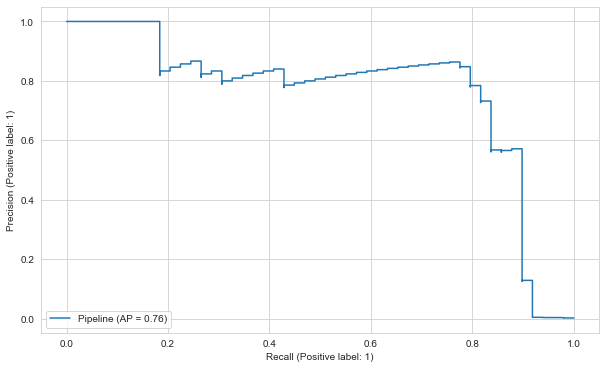

In [57]:
plot_precision_recall_curve(pipe_model_weight, X_test, y_test);

In [58]:
y_pred_proba = pipe_model.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.7709882639399235

***v. Apply and Plot StratifiedKFold***

https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html

In [59]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [60]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.08215872662725149

In [61]:
from sklearn.model_selection import StratifiedKFold    # Modeli kaç parçaya ayırmak istiyorsak ona göre index numaraları belirler.

def CV(n, est, X, y, optimal_threshold):
    skf = StratifiedKFold(n_splits = n, shuffle = True, random_state = 42)
    acc_scores = []
    pre_scores = []
    rec_scores = []
    f1_scores  = []
    
    X = X.reset_index(drop=True)       # Index no'ları her işlemden sonra sıfırlaması için.
    y = y.reset_index(drop=True)
    
    for train_index, test_index in skf.split(X, y):
        
        X_train = X.loc[train_index]
        y_train = y.loc[train_index]
        X_test = X.loc[test_index]
        y_test = y.loc[test_index]
        
        
        est = est
        est.fit(X_train, y_train)
        y_pred = est.predict(X_test)
        y_pred_proba = est.predict_proba(X_test)
             
        y_pred2 = pd.Series(y_pred_proba[:,1]).apply(lambda x : 1 if x >= optimal_threshold else 0)
        
        acc_scores.append(accuracy_score(y_test, y_pred2))
        pre_scores.append(precision_score(y_test, y_pred2, pos_label=1))
        rec_scores.append(recall_score(y_test, y_pred2, pos_label=1))
        f1_scores.append(f1_score(y_test, y_pred2, pos_label=1))
    
    print(f'Accuracy {np.mean(acc_scores)*100:>10,.2f}%  std {np.std(acc_scores)*100:.2f}%')
    print(f'Precision-1 {np.mean(pre_scores)*100:>7,.2f}%  std {np.std(pre_scores)*100:.2f}%')
    print(f'Recall-1 {np.mean(rec_scores)*100:>10,.2f}%  std {np.std(rec_scores)*100:.2f}%')
    print(f'F1_score-1 {np.mean(f1_scores)*100:>8,.2f}%  std {np.std(f1_scores)*100:.2f}%')

In [73]:
CV(10, pipe_model, pd.DataFrame(X_train), y_train, 0.5)

Accuracy      99.92%  std 0.01%
Precision-1   87.62%  std 3.62%
Recall-1      63.48%  std 8.47%
F1_score-1    73.30%  std 6.03%


In [74]:
CV(10, pipe_model, pd.DataFrame(X_train), y_train, optimal_threshold)

Accuracy      99.93%  std 0.01%
Precision-1   79.36%  std 5.53%
Recall-1      79.03%  std 5.15%
F1_score-1    79.04%  std 3.90%


- Didn't the performance of the model you implemented above satisfy you? If your model is biased towards the majority class and minority class recall is not sufficient, apply **SMOTE**.

### Apply SMOTE (Synthetic Minority Oversampling Technique)

In [66]:
#conda install imblearn

In [64]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline as imbpipeline

In [65]:
y_train.value_counts()

0    255883
1       443
dtype: int64

In [78]:
#over = SMOTE(sampling_strategy=0.1)
#under = RandomUnderSampler(sampling_strategy=0.5)

SMOTE islemi ile az olan 1 class' inin veri sayisini sentetik olarak artirarak yaklasik 3 katina cikardik. 0 class' ina ait veri sayisini da yaklasik 2.5 kat azalttik :

In [67]:
over = SMOTE(sampling_strategy={1: 1000})
under = RandomUnderSampler(sampling_strategy={0: 100000})

In [68]:
X_resampled, y_resampled = over.fit_resample(X_train, y_train)

In [69]:
X_resampled, y_resampled = under.fit_resample(X_resampled, y_resampled)

In [70]:
y_resampled.value_counts()

0    100000
1      1000
dtype: int64

### Logistic Regression with SMOTE

- The steps you are going to cover for this algorithm are as follows:
   
   *i. Train-Test Split (Again)*
   
   *ii. Model Training*
   
   *iii. Prediction and Model Evaluating*
   
   *iv. Plot Precision and Recall Curve*
   
   *v. Apply and Plot StratifiedKFold*

***i. Train-Test Split (Again)***

Use SMOTE applied data.

In [83]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [71]:
class_weight_smote = {0:1, 1:1}

In [72]:
operations = [('o', over), ('u', under), ("scaler", StandardScaler()), 
              ('log', LogisticRegression(class_weight=class_weight_smote, random_state = 42))]

In [73]:
smote_pipeline_log = imbpipeline(steps=operations)

***ii. Model Training***

In [74]:
smote_pipeline_log.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={1: 1000})),
                ('u', RandomUnderSampler(sampling_strategy={0: 100000})),
                ('scaler', StandardScaler()),
                ('log',
                 LogisticRegression(class_weight={0: 1, 1: 1},
                                    random_state=42))])

***iii. Prediction and Model Evaluating***

Smote isleminden sonra kurulan Logistic Regression modelde precision ve recall skorlari birbirine biraz daha yaklasti :

In [75]:
eval_metric(smote_pipeline_log, X_train, y_train, X_test, y_test)

Test_Set
[[28413    19]
 [    9    40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.68      0.82      0.74        49

    accuracy                           1.00     28481
   macro avg       0.84      0.91      0.87     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255796     87]
 [    88    355]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.80      0.80      0.80       443

    accuracy                           1.00    256326
   macro avg       0.90      0.90      0.90    256326
weighted avg       1.00      1.00      1.00    256326



#### Cross Validate

In [89]:
model = smote_pipeline_log = imbpipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy   1.00
test_recall     0.80
test_f1         0.80
dtype: float64

***iv.  Plot Precision and Recall Curve***


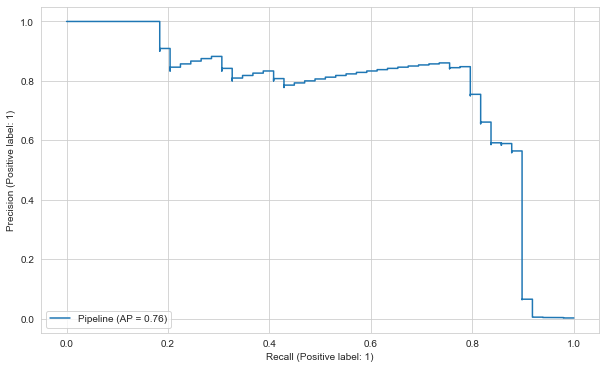

In [76]:
plot_precision_recall_curve(smote_pipeline_log, X_test, y_test);

***v. Apply and Plot StratifiedKFold***

In [91]:
 CV(10, smote_pipeline_log, pd.DataFrame(X_train), y_train, optimal_threshold)

Accuracy      99.83%  std 0.04%
Precision-1   50.87%  std 5.90%
Recall-1      85.34%  std 4.02%
F1_score-1    63.57%  std 5.22%


In [92]:
 CV(10, smote_pipeline_log, pd.DataFrame(X_train), y_train, 0.5)

Accuracy      99.93%  std 0.01%
Precision-1   79.88%  std 4.28%
Recall-1      79.94%  std 4.86%
F1_score-1    79.83%  std 3.74%


In [77]:
y_pred = smote_pipeline_log.predict(X_test)
smote_pipeline_f1 = f1_score(y_test, y_pred)
smote_pipeline_recall = recall_score(y_test, y_pred)
smote_pipeline_auc = roc_auc_score(y_test, y_pred)

### Random Forest Classifier with SMOTE

- The steps you are going to cover for this algorithm are as follows:

   *i. Model Training*
   
   *ii. Prediction and Model Evaluating*
   
   *iii. Plot Precision and Recall Curve*
   
   *iv. Apply and Plot StratifiedKFold*
   

***i. Model Training***

In [78]:
from sklearn.ensemble import RandomForestClassifier

In [80]:
class_weights = {0 : 1, 1 : 1}

In [81]:
over = SMOTE(sampling_strategy={1: 1000})
under = RandomUnderSampler(sampling_strategy={0: 100000})

In [82]:
rf_operations = [('o', over), ('u', under), ('rf', RandomForestClassifier(class_weight=class_weights, max_depth=7, random_state=42))]
smote_rf_model = imbpipeline(steps=rf_operations)

In [83]:
smote_rf_model.fit(X_train, y_train)

Pipeline(steps=[('o', SMOTE(sampling_strategy={1: 1000})),
                ('u', RandomUnderSampler(sampling_strategy={0: 100000})),
                ('rf',
                 RandomForestClassifier(class_weight={0: 1, 1: 1}, max_depth=7,
                                        random_state=42))])

RF default parametreler ile kurulan modelde overfit durumu gozlendi. Parametreler ile oynanarak en iyi skor max_depth=7 parametresi ile alindi :

In [84]:
eval_metric(smote_rf_model, X_train, y_train, X_test, y_test)

Test_Set
[[28424     8]
 [    9    40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.83      0.82      0.82        49

    accuracy                           1.00     28481
   macro avg       0.92      0.91      0.91     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255837     46]
 [    83    360]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.89      0.81      0.85       443

    accuracy                           1.00    256326
   macro avg       0.94      0.91      0.92    256326
weighted avg       1.00      1.00      1.00    256326



In [85]:
model = RandomForestClassifier(class_weight = class_weights, max_depth=7, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy    1.00
test_precision   0.96
test_recall      0.74
test_f1          0.84
dtype: float64

In [86]:
y_pred = smote_rf_model.predict(X_test)
smote_rf_f1 = f1_score(y_test, y_pred)
smote_rf_recall = recall_score(y_test, y_pred)
smote_rf_auc = roc_auc_score(y_test, y_pred)

In [87]:
smote_rf_model.predict(X.loc[[541]])      # True prediction

array([1], dtype=int64)

In [88]:
smote_rf_model.predict(X.loc[[623]])        # Wrong prediction

array([0], dtype=int64)

***ii. Prediction and Model Evaluating***

***iii. Plot Precision and Recall Curve***


In [ ]:
plot_precision_recall_curve(smote_rf_model, X_test, y_test);

***iv. Apply and Plot StratifiedKFold***

In [89]:
# without class_weight for StratifiedKFold :

rf_operations = [('o', over), ('u', under), ('rf', RandomForestClassifier(max_depth=7, random_state=42))]
rf_stratified = imbpipeline(steps=rf_operations)

rf_stratified.fit(X_train, y_train)

eval_metric(rf_stratified, X_train, y_train, X_test, y_test)

Test_Set
[[28423     9]
 [    8    41]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.82      0.84      0.83        49

    accuracy                           1.00     28481
   macro avg       0.91      0.92      0.91     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255839     44]
 [    73    370]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.89      0.84      0.86       443

    accuracy                           1.00    256326
   macro avg       0.95      0.92      0.93    256326
weighted avg       1.00      1.00      1.00    256326



In [90]:
model = RandomForestClassifier(max_depth=7, random_state=42)

scores = cross_validate(model, X_train, y_train, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy    1.00
test_precision   0.96
test_recall      0.74
test_f1          0.84
dtype: float64

In [91]:
y_pred_proba = rf_stratified.predict_proba(X_train)
average_precision_score(y_train, y_pred_proba[:,1])

0.870120305052705

In [92]:
precisions, recalls, thresholds = precision_recall_curve(y_train, y_pred_proba[:,1])

In [93]:
optimal_idx = np.argmax((2 * precisions * recalls) / (precisions + recalls))
optimal_threshold = thresholds[optimal_idx]
optimal_threshold

0.6282455614162035

In [94]:
CV(10, smote_rf_model, pd.DataFrame(X_train), y_train, optimal_threshold)

Accuracy      99.95%  std 0.01%
Precision-1   90.37%  std 3.27%
Recall-1      77.23%  std 5.88%
F1_score-1    83.14%  std 3.70%


In [95]:
CV(10, smote_rf_model, pd.DataFrame(X_train), y_train, 0.5)

Accuracy      99.94%  std 0.01%
Precision-1   84.76%  std 2.96%
Recall-1      80.37%  std 4.71%
F1_score-1    82.36%  std 1.92%


In [96]:
CV(10, rf_stratified, pd.DataFrame(X_train), y_train, optimal_threshold)

Accuracy      99.95%  std 0.01%
Precision-1   89.69%  std 3.64%
Recall-1      78.13%  std 5.63%
F1_score-1    83.31%  std 2.88%


In [97]:
CV(10, rf_stratified, pd.DataFrame(X_train), y_train, 0.5)

Accuracy      99.94%  std 0.01%
Precision-1   86.44%  std 4.06%
Recall-1      81.29%  std 5.26%
F1_score-1    83.59%  std 2.54%


### SHAP

In [98]:
conda install shap

Note: you may need to restart the kernel to use updated packages.

Solving environment: ...working... done

# All requested packages already installed.



#### Shap for Random Forest

In [99]:
import shap

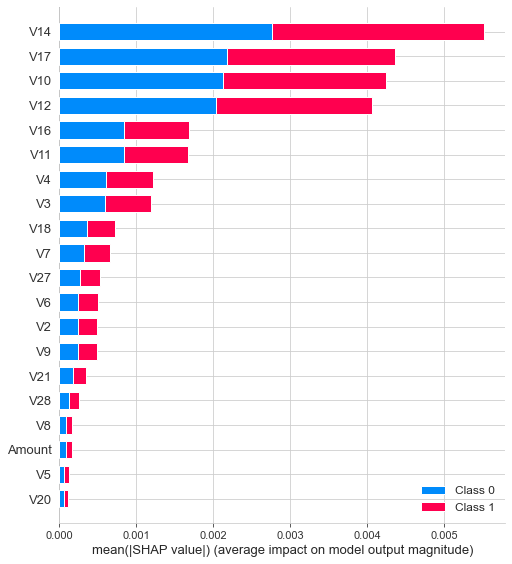

In [100]:
explainer = shap.TreeExplainer(smote_rf_model["rf"])
shap_values = explainer.shap_values(X_test,approximate=True)
shap.summary_plot(shap_values, X_test, plot_type="bar", feature_names=X.columns)

SHAP yontemi ile, yukarida kurdugumuz rf model kullanilarak azinlik sinif olan 1 class' ina en cok etki eden feature' lar secilerek yeni bir model kurulacak :

In [101]:
feature = ['V14', 'V17', 'V12', 'V10', 'V11', 'V16']

In [102]:
X2 = df[feature]
y = df.Class

In [103]:
X2.shape

(284807, 6)

In [104]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.1, random_state=42, stratify =y)

In [105]:
shap_rf_model = RandomForestClassifier(max_depth=7, random_state=42)

In [106]:
shap_rf_model.fit(X_train2, y_train2)

RandomForestClassifier(max_depth=7, random_state=42)

In [107]:
eval_metric(shap_rf_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[28425     7]
 [   12    37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.84      0.76      0.80        49

    accuracy                           1.00     28481
   macro avg       0.92      0.88      0.90     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255841     42]
 [    96    347]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.89      0.78      0.83       443

    accuracy                           1.00    256326
   macro avg       0.95      0.89      0.92    256326
weighted avg       1.00      1.00      1.00    256326



In [108]:
model = RandomForestClassifier(max_depth=7, random_state=42)

scores = cross_validate(model, X_train2, y_train2, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy    1.00
test_precision   0.88
test_recall      0.76
test_f1          0.82
dtype: float64

In [109]:
y_pred = shap_rf_model.predict(X_test2)
shap_rf_f1 = f1_score(y_test2, y_pred)
shap_rf_recall = recall_score(y_test2, y_pred)
shap_rf_auc = roc_auc_score(y_test2, y_pred)

***with class_weight***

In [110]:
class_weights = {0:1, 1:1}

In [111]:
shap_rf_model_weight = RandomForestClassifier(class_weight = class_weights, max_depth=7, random_state=42)

In [112]:
shap_rf_model_weight.fit(X_train2, y_train2)

RandomForestClassifier(class_weight={0: 1, 1: 1}, max_depth=7, random_state=42)

In [113]:
eval_metric(shap_rf_model_weight, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[28425     7]
 [   12    37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.84      0.76      0.80        49

    accuracy                           1.00     28481
   macro avg       0.92      0.88      0.90     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255841     42]
 [    96    347]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.89      0.78      0.83       443

    accuracy                           1.00    256326
   macro avg       0.95      0.89      0.92    256326
weighted avg       1.00      1.00      1.00    256326



In [114]:
model = RandomForestClassifier(class_weight = class_weights, max_depth=7, random_state=42)

scores = cross_validate(model, X_train2, y_train2, scoring = ['accuracy', 'precision', 'recall', 'f1'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))

df_scores.mean()[2:]

test_accuracy    1.00
test_precision   0.88
test_recall      0.76
test_f1          0.82
dtype: float64

In [115]:
y_pred = shap_rf_model_weight.predict(X_test2)
shap_rf_weight_f1 = f1_score(y_test2, y_pred)
shap_rf_weight_recall = recall_score(y_test2, y_pred)
shap_rf_weight_auc = roc_auc_score(y_test2, y_pred)

#### Shap for Logistic Regression

Logistic Regression ile feature importance yapabilmek icin Lasso uygulanmasi zorunludur; bu yuzden penalty='l1' olarak sectik. l1; liblinear ya da saga ile kullanilir. ('saga' buyuk datalarda tercih edilir.)
Shap ile model uygulanirken, hangi class' la ilgili problem varsa o class' a ait skorlarin en iyi oldugu modeli secmemiz gerekir. Bu yuzden biz Logistic' te 1 class' i icin en iyi sonucu elde ettigimiz parametreleri tanimladik. Feature selection yapacagimiz icin tahminlerin iyi oldugundan emin olmamiz gerekir.  Feature selection yapilabilecek modellerin secilmesi dogru olur (Ornegin SVM model feature selection' da tercih edilmez, cunku kotu sonuclar verir. )

In [116]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [117]:
pipe_shap_model = LogisticRegression(class_weight={0:1, 1:5}, random_state = 42, penalty="l1", solver='saga')
pipe_shap_model.fit(X_train_scaled, y_train)

LogisticRegression(class_weight={0: 1, 1: 5}, penalty='l1', random_state=42,
                   solver='saga')

In [118]:
eval_metric(pipe_shap_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[28417    15]
 [    9    40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.73      0.82      0.77        49

    accuracy                           1.00     28481
   macro avg       0.86      0.91      0.88     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255802     81]
 [    90    353]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.81      0.80      0.81       443

    accuracy                           1.00    256326
   macro avg       0.91      0.90      0.90    256326
weighted avg       1.00      1.00      1.00    256326



__Duzeltme -->__ Asagidaki koda feature_names=X.columns eklenecek ve feature selection ona gore yapilacak.

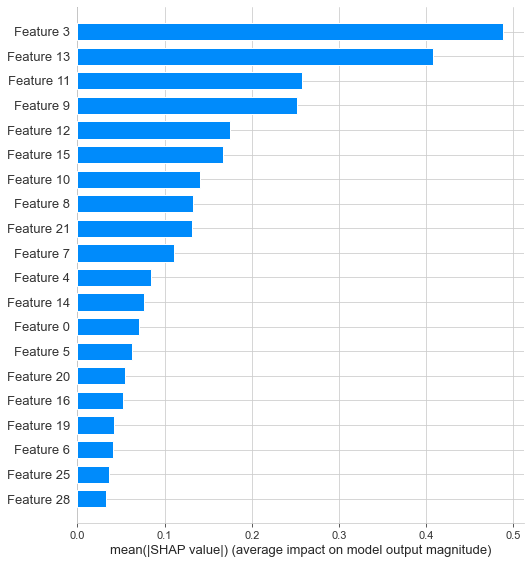

In [136]:
explainer = shap.Explainer(pipe_shap_model, X_train_scaled)    # Feature' lara göre renklendirme yapamadım?

shap_values = explainer.shap_values(X_test_scaled)

shap.summary_plot(shap_values, X_train_scaled, plot_type="bar")  # feature_names=X.columns, class_names = df.Class.value_counts(), class_inds=df.Class.index

In [137]:
feature_2 = ['V3', 'V13', 'V11', 'V9', 'V12', 'V15']

In [138]:
X3 = df[feature_2]
y = df.Class

In [139]:
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y, test_size=0.1, random_state=42, stratify =y)

In [143]:
operations = [("scaler", StandardScaler()), ('log', LogisticRegression(class_weight={0:1, 1:8}))]
pipe_model_weight = Pipeline(steps=operations)
pipe_model_weight.fit(X_train3, y_train3)
eval_metric(pipe_model_weight, X_train3, y_train3, X_test3, y_test3)

Test_Set
[[28418    14]
 [   10    39]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.74      0.80      0.76        49

    accuracy                           1.00     28481
   macro avg       0.87      0.90      0.88     28481
weighted avg       1.00      1.00      1.00     28481


Train_Set
[[255799     84]
 [   117    326]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    255883
           1       0.80      0.74      0.76       443

    accuracy                           1.00    256326
   macro avg       0.90      0.87      0.88    256326
weighted avg       1.00      1.00      1.00    256326



In [144]:
operations = [('scaler',StandardScaler()),('log',LogisticRegression(class_weight={0:1, 1:8}))]
model = Pipeline(operations)

scores = cross_validate(model, X_train3, y_train3, scoring = ['precision','recall','f1','accuracy'], cv = 10)
df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_precision   0.80
test_recall      0.74
test_f1          0.76
test_accuracy    1.00
dtype: float64

In [145]:
y_pred = pipe_model_weight.predict(X_test3)
pipe_shap_f1 = f1_score(y_test3, y_pred)
pipe_shap_recall = recall_score(y_test3, y_pred)
pipe_shap_auc = roc_auc_score(y_test3, y_pred)

### Comparing Models

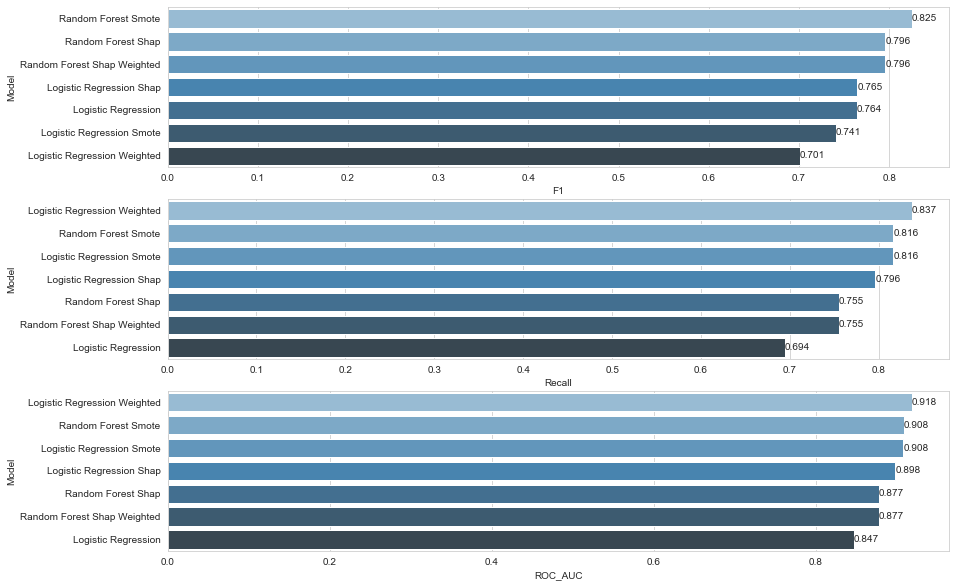

In [146]:
compare = pd.DataFrame({"Model": ["Logistic Regression", "Logistic Regression Weighted", "Logistic Regression Smote", "Random Forest Smote", 
                                   "Random Forest Shap", "Random Forest Shap Weighted", "Logistic Regression Shap"], 
                        "F1": [log_f1, log_weighted_f1, smote_pipeline_f1, smote_rf_f1, shap_rf_f1, shap_rf_weight_f1, pipe_shap_f1],
                        "Recall": [log_recall, log_weighted_recall, smote_pipeline_recall, smote_rf_recall, shap_rf_recall, shap_rf_weight_recall, pipe_shap_recall],
                        "ROC_AUC": [log_auc, log_weighted_auc, smote_pipeline_auc, smote_rf_auc, shap_rf_auc, shap_rf_weight_auc, pipe_shap_auc]})

def labels(ax):
    for p in ax.patches:
        width = p.get_width()                        # get bar length
        ax.text(width,                               # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2,      # get Y coordinate + X coordinate / 2
                '{:1.3f}'.format(width),             # set variable to display, 2 decimals
                ha = 'left',                         # horizontal alignment
                va = 'center')                       # vertical alignment
    
plt.figure(figsize=(14,10))
plt.subplot(311)
compare = compare.sort_values(by="F1", ascending=False)
ax=sns.barplot(x="F1", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(312)
compare = compare.sort_values(by="Recall", ascending=False)
ax=sns.barplot(x="Recall", y="Model", data=compare, palette="Blues_d")
labels(ax)

plt.subplot(313)
compare = compare.sort_values(by="ROC_AUC", ascending=False)
ax=sns.barplot(x="ROC_AUC", y="Model", data=compare, palette="Blues_d")
labels(ax)
plt.show()

### Neural Network

In the final step, you will make classification with Neural Network which is a Deep Learning algorithm. 

Neural networks are a series of algorithms that mimic the operations of a human brain to recognize relationships between vast amounts of data. They are used in a variety of applications in financial services, from forecasting and marketing research to fraud detection and risk assessment.

A neural network contains layers of interconnected nodes. Each node is a perceptron and is similar to a multiple linear regression. The perceptron feeds the signal produced by a multiple linear regression into an activation function that may be nonlinear.

In a multi-layered perceptron (MLP), perceptrons are arranged in interconnected layers. The input layer collects input patterns. The output layer has classifications or output signals to which input patterns may map. 

Hidden layers fine-tune the input weightings until the neural network’s margin of error is minimal. It is hypothesized that hidden layers extrapolate salient features in the input data that have predictive power regarding the outputs.

You will discover **[how to create](https://towardsdatascience.com/building-our-first-neural-network-in-keras-bdc8abbc17f5)** your deep learning neural network model in Python using **[Keras](https://keras.io/about/)**. Keras is a powerful and easy-to-use free open source Python library for developing and evaluating deep learning models.

- The steps you are going to cover for this algorithm are as follows:

   *i. Import Libraries*
   
   *ii. Define Model*
    
   *iii. Compile Model*
   
   *iv. Fit Model*
   
   *v. Prediction and Model Evaluating*
   
   *vi. Plot Precision and Recall Curve*

***i. Import Libraries***

In [128]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report, confusion_matrix

***ii. Define Model***

Tum feature' lar kullanilarak kurulan ANN model skorlari ile Random Forest Shap modelinden sonra alinan skorlar birbirlerine yakin cikti. Deployment asamasinda daha az feature ile ugrasmak adina Random Forest' tan elde edilen feature' lar ile devam edildi. (Logistic Regression Shap islemi ile elde edilen feature' lar ile olusturulan ANN model skorlari RF' e gore daha kotu cikti.)

In [129]:
X2 = df[feature]             
y = df.Class.values
seed = 42
X_train, X_test, y_train, y_test = train_test_split(X2,
                                                    y,
                                                    stratify=y,
                                                    test_size=0.1,
                                                    random_state=seed)

In [130]:
scaler = StandardScaler()

In [131]:
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [132]:
tf.random.set_seed(seed)

model_ann = Sequential()

model_ann.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model_ann.add(Dense(15, activation = "relu"))
model_ann.add(Dense(1, activation = "sigmoid"))

***iii. Compile Model***

In [133]:
model_ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

***iv. Fit Model***

In [134]:
early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=5, restore_best_weights = True)

In [135]:
model_ann.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 200, callbacks=[early_stop], verbose=1)

Epoch 1/200
7210/7210 [==============================] - 32s 4ms/step - loss: 0.0088 - recall: 0.6514 - val_loss: 0.0041 - val_recall: 0.7600
Epoch 2/200
7210/7210 [==============================] - 27s 4ms/step - loss: 0.0036 - recall: 0.7583 - val_loss: 0.0043 - val_recall: 0.6000
Epoch 3/200
7210/7210 [==============================] - 26s 4ms/step - loss: 0.0034 - recall: 0.7710 - val_loss: 0.0039 - val_recall: 0.7800
Epoch 4/200
7210/7210 [==============================] - 27s 4ms/step - loss: 0.0034 - recall: 0.7786 - val_loss: 0.0037 - val_recall: 0.7800
Epoch 5/200
7210/7210 [==============================] - 26s 4ms/step - loss: 0.0033 - recall: 0.7888 - val_loss: 0.0038 - val_recall: 0.7800
Epoch 6/200
7210/7210 [==============================] - 27s 4ms/step - loss: 0.0032 - recall: 0.7761 - val_loss: 0.0039 - val_recall: 0.7800
Epoch 7/200
7210/7210 [==============================] - 26s 4ms/step - loss: 0.0032 - recall: 0.7837 - val_loss: 0.0039 - val_recall: 0.7800
Epoch 

In [136]:
model_ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 30)                210       
                                                                 
 dense_1 (Dense)             (None, 15)                465       
                                                                 
 dense_2 (Dense)             (None, 1)                 16        
                                                                 
Total params: 691
Trainable params: 691
Non-trainable params: 0
_________________________________________________________________


In [137]:
loss_df = pd.DataFrame(model_ann.history.history)
loss_df.head()

loss  recall  val_loss  val_recall
0  0.01    0.65      0.00        0.76
1  0.00    0.76      0.00        0.60
2  0.00    0.77      0.00        0.78
3  0.00    0.78      0.00        0.78
4  0.00    0.79      0.00        0.78

In [138]:
loss_df.plot();

***v. Prediction and Model Evaluating***

In [139]:
model_ann.evaluate(X_test, y_test, verbose=0) 

[0.0029333417769521475, 0.7551020383834839]

In [140]:
loss, recall = model_ann.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", recall)

loss :  0.0029333417769521475
Recall :  0.7551020383834839


In [141]:
#0.1 test size
y_pred = (model_ann.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28425     7]
 [   12    37]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.84      0.76      0.80        49

    accuracy                           1.00     28481
   macro avg       0.92      0.88      0.90     28481
weighted avg       1.00      1.00      1.00     28481



In [142]:
from sklearn.metrics import precision_recall_curve

In [143]:
y_pred_proba = model_ann.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [144]:
average_precision_score(y_test, y_pred_proba)

0.812891972417784

***with class_weight***

In [145]:
tf.random.set_seed(seed)

model = Sequential()

model.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
model.add(Dense(15, activation = "relu"))
model.add(Dense(8, activation = "relu"))
model.add(Dense(1, activation = "sigmoid"))

In [146]:
model.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

In [147]:
from sklearn.utils import class_weight

# class_weights = class_weight.compute_class_weight('balanced',
#                                                  classes=np.unique(y_train),
#                                                 y=y_train)

class_weights = {0 : 1, 1 : 30}

In [148]:
model.fit(x = X_train, y = y_train, validation_split = 0.1, batch_size = 32, epochs = 200, callbacks=[early_stop], class_weight=class_weights, verbose=1)

Epoch 1/200
7210/7210 [==============================] - 30s 4ms/step - loss: 0.0653 - recall: 0.8092 - val_loss: 0.0198 - val_recall: 0.8000
Epoch 2/200
7210/7210 [==============================] - 29s 4ms/step - loss: 0.0488 - recall: 0.8244 - val_loss: 0.0113 - val_recall: 0.8200
Epoch 3/200
7210/7210 [==============================] - 28s 4ms/step - loss: 0.0475 - recall: 0.8346 - val_loss: 0.0133 - val_recall: 0.8000
Epoch 4/200
7210/7210 [==============================] - 28s 4ms/step - loss: 0.0477 - recall: 0.8295 - val_loss: 0.0172 - val_recall: 0.8200
Epoch 5/200
7210/7210 [==============================] - 29s 4ms/step - loss: 0.0468 - recall: 0.8321 - val_loss: 0.0220 - val_recall: 0.8200
Epoch 6/200
7210/7210 [==============================] - 28s 4ms/step - loss: 0.0451 - recall: 0.8295 - val_loss: 0.0109 - val_recall: 0.8200
Epoch 7/200
7210/7210 [==============================] - 29s 4ms/step - loss: 0.0448 - recall: 0.8295 - val_loss: 0.0089 - val_recall: 0.8200
Epoch 

In [149]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 30)                210       
                                                                 
 dense_4 (Dense)             (None, 15)                465       
                                                                 
 dense_5 (Dense)             (None, 8)                 128       
                                                                 
 dense_6 (Dense)             (None, 1)                 9         
                                                                 
Total params: 812
Trainable params: 812
Non-trainable params: 0
_________________________________________________________________


In [150]:
loss_df = pd.DataFrame(model.history.history)
loss_df.head()

loss  recall  val_loss  val_recall
0  0.07    0.81      0.02        0.80
1  0.05    0.82      0.01        0.82
2  0.05    0.83      0.01        0.80
3  0.05    0.83      0.02        0.82
4  0.05    0.83      0.02        0.82

In [151]:
loss_df.plot();

***v. Prediction and Model Evaluating***

In [152]:
model.evaluate(X_test, y_test, verbose=0)    

[0.008595761843025684, 0.8571428656578064]

In [153]:
loss, recall = model.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("Recall : ", recall)

loss :  0.008595761843025684
Recall :  0.8571428656578064


In [154]:
#with class_weight = 10
y_pred = (model.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28414    18]
 [    7    42]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.70      0.86      0.77        49

    accuracy                           1.00     28481
   macro avg       0.85      0.93      0.89     28481
weighted avg       1.00      1.00      1.00     28481



***vi. Plot Precision and Recall Curve***

In [155]:
y_pred_proba = model.predict(X_test)
precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred_proba)
plt.plot(recalls, precisions, label='ANN')
plt.xlabel('recalls')
plt.ylabel('precisions')
plt.title('Precision-Recall curve')
plt.show()

In [156]:
average_precision_score(y_test, y_pred_proba)

0.8201091295769526

## 4. Model Deployement
You cooked the food in the kitchen and moved on to the serving stage. The question is how do you showcase your work to others? Model Deployement helps you showcase your work to the world and make better decisions with it. But, deploying a model can get a little tricky at times. Before deploying the model, many things such as data storage, preprocessing, model building and monitoring need to be studied.

Deployment of machine learning models, means making your models available to your other business systems. By deploying models, other systems can send data to them and get their predictions, which are in turn populated back into the company systems. Through machine learning model deployment, can begin to take full advantage of the model you built.

Data science is concerned with how to build machine learning models, which algorithm is more predictive, how to design features, and what variables to use to make the models more accurate. However, how these models are actually used is often neglected. And yet this is the most important step in the machine learning pipline. Only when a model is fully integrated with the business systems, real values ​​can be extract from its predictions.

After doing the following operations in this notebook, jump to a proper IDE and create your web app with Flask API.

### Save and Export the Model as .pkl


### Logistic Regression and RF :

In [157]:
class_weights = {0 : 1, 1 : 10}

In [158]:
operations = [("scaler", StandardScaler()), ('log', LogisticRegression(class_weight=class_weights))]
log_model_final = Pipeline(steps=operations)
log_model_final.fit(X2, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('log', LogisticRegression(class_weight={0: 1, 1: 10}))])

In [159]:
rf_model_final = RandomForestClassifier(class_weight = class_weights, max_depth=7)
rf_model_final.fit(X2,y)

RandomForestClassifier(class_weight={0: 1, 1: 10}, max_depth=7)

In [160]:
import joblib

In [161]:
joblib.dump(rf_model_final, open('rf_model_final.pkl', 'wb'))
#joblib.dump(log_model_final, open('log_model_final.pkl', 'wb'))

### ANN :

In [162]:
joblib.dump(scaler, open('scaler', 'wb'))

In [163]:
tf.random.set_seed(seed)

final_model_ann = Sequential()

final_model_ann.add(Dense(30, activation = "relu", input_dim = X_train.shape[1]))
final_model_ann.add(Dense(15, activation = "relu"))
final_model_ann.add(Dense(1, activation = "sigmoid"))

final_model_ann.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["Recall"])

early_stop = EarlyStopping(monitor="val_loss",
                           mode="auto",
                           verbose=1,
                           patience=5, restore_best_weights = True)

from sklearn.utils import class_weight
class_weights = {0 : 1, 1 : 30}

In [164]:
final_model_ann.fit(x = X_train, y = y_train, validation_data = (X_test, y_test), batch_size = 32, epochs = 200, callbacks=[early_stop], class_weight=class_weights, verbose=1)

Epoch 1/200
8011/8011 [==============================] - 32s 4ms/step - loss: 0.0664 - recall: 0.7810 - val_loss: 0.0100 - val_recall: 0.8163
Epoch 2/200
8011/8011 [==============================] - 31s 4ms/step - loss: 0.0498 - recall: 0.8239 - val_loss: 0.0186 - val_recall: 0.8776
Epoch 3/200
8011/8011 [==============================] - 31s 4ms/step - loss: 0.0474 - recall: 0.8284 - val_loss: 0.0120 - val_recall: 0.8367
Epoch 4/200
8011/8011 [==============================] - 31s 4ms/step - loss: 0.0474 - recall: 0.8307 - val_loss: 0.0212 - val_recall: 0.8776
Epoch 5/200
8011/8011 [==============================] - 31s 4ms/step - loss: 0.0469 - recall: 0.8262 - val_loss: 0.0126 - val_recall: 0.8571
Epoch 6/200
8011/8011 [==============================] - 31s 4ms/step - loss: 0.0459 - recall: 0.8217 - val_loss: 0.0120 - val_recall: 0.8776
Epoch 6: early stopping


In [165]:
loss_df = pd.DataFrame(final_model_ann.history.history)
loss_df.plot();

In [166]:
loss, recall = final_model_ann.evaluate(X_test, y_test, verbose=0)
print("loss : ", loss)
print("recall : ", recall)

loss :  0.010037769563496113
recall :  0.8163265585899353


In [167]:
y_pred = (final_model_ann.predict(X_test) > 0.5).astype("int32")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[28415    17]
 [    9    40]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     28432
           1       0.70      0.82      0.75        49

    accuracy                           1.00     28481
   macro avg       0.85      0.91      0.88     28481
weighted avg       1.00      1.00      1.00     28481



In [168]:
# Saving the model for Future Inferences

model_json = final_model_ann.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
    
# serialize weights to HDF5
final_model_ann.save_weights("model.h5")

In [169]:
X2.loc[541]

V14   -4.29
V17   -2.83
V12   -2.90
V10   -2.77
V11    3.20
V16   -1.14
Name: 541, dtype: float64

In [170]:
rf_model_final.predict(X2.loc[[541]])      

array([1])

In [171]:
log_model_final.predict(X2.loc[[541]])      

array([1])

In [172]:
final_model_ann.predict(X2.loc[[541]])      

array([[0.9614844]], dtype=float32)

In [173]:
X2.loc[623]

V14   -1.69
V17    0.60
V12   -0.50
V10   -0.84
V11   -0.41
V16    0.67
Name: 623, dtype: float64

In [174]:
rf_model_final.predict(X2.loc[[623]])      

array([0])

In [175]:
log_model_final.predict(X2.loc[[623]])      

array([0])

In [176]:
final_model_ann.predict(X2.loc[[623]])      

array([[0.02453556]], dtype=float32)

### Save and Export Variables as .pkl

In [179]:
columns_rf = X2.columns
columns_rf

Index(['V14', 'V17', 'V12', 'V10', 'V11', 'V16'], dtype='object')

In [180]:
columns_log = X3.columns
columns_log

Index(['V3', 'V13', 'V11', 'V9', 'V12', 'V15'], dtype='object')

In [178]:
joblib.dump(columns, open('columns', 'wb'))

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___